In [38]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float, exposure
from skimage.restoration import richardson_lucy

In [39]:
# Load the image
img = cv2.imread("C:/Users/needh/Documents/UNI/2024/Sem_2_2024/ICT342/SEAING/underwater1.jpg") # Change between underwater1, 2, 3.

In [40]:
# White Balance Correction
def apply_white_balance(image):
    result = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    avg_a = np.average(result[:, :, 1])
    avg_b = np.average(result[:, :, 2])
    result[:, :, 1] = result[:, :, 1] - ((avg_a - 128) * (result[:, :, 0] / 255.0) * 0.8)
    result[:, :, 2] = result[:, :, 2] - ((avg_b - 128) * (result[:, :, 0] / 255.0) * 0.8)
    return cv2.cvtColor(result, cv2.COLOR_LAB2BGR)

# Apply white balance correction
img_corrected = apply_white_balance(img)

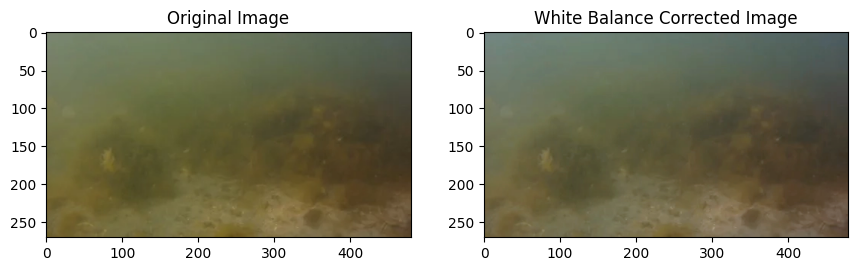

In [41]:
# Create a figure for displaying all images
plt.figure(figsize=(16, 12))

# Display the original image
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(img[:, :, ::-1])

# Display original and white balance corrected image
plt.subplot(2, 3, 2)
plt.title("White Balance Corrected Image")
plt.imshow(img_corrected[:, :, ::-1])

Super-resolution completed in 10.38 seconds.


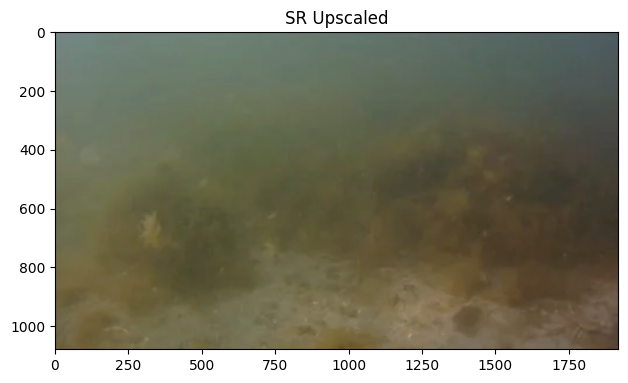

In [42]:
# Super-Resolution Upscaling
sr = cv2.dnn_superres.DnnSuperResImpl_create()
sr_model_path = "EDSR_x4.pb"
sr.readModel(sr_model_path)
sr.setModel("edsr", 4)  # Using EDSR model with 4x scaling

# Upscale the image
start = time.time()
sr_result = sr.upsample(img_corrected)
print(f"Super-resolution completed in {time.time() - start:.2f} seconds.")

# Display the image
plt.figure(figsize=(16, 12))

plt.subplot(1, 2, 1)
plt.title("SR Upscaled")
plt.imshow(sr_result[:, :, ::-1])

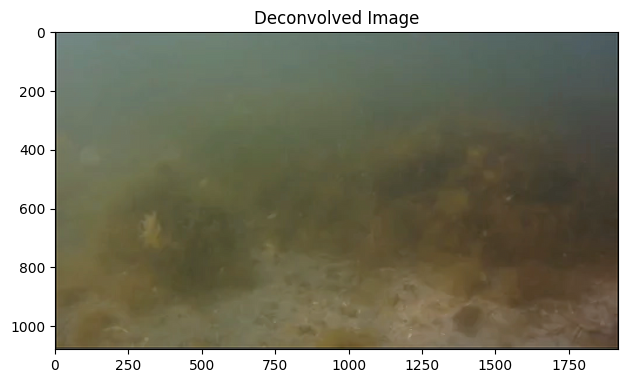

In [43]:
# Richardson-Lucy Deconvolution
sr_result_float = img_as_float(sr_result)  # Convert to float for deconvolution
psf = np.ones((5, 5)) / 25  # Point Spread Function

# Apply deconvolution channel by channel
deconvolved = np.zeros_like(sr_result_float)
for i in range(3):
    deconvolved[:, :, i] = richardson_lucy(sr_result_float[:, :, i], psf, num_iter=30)

# Display the image
plt.figure(figsize=(16, 12))

plt.subplot(1, 2, 1)
plt.title("Deconvolved Image")
plt.imshow(deconvolved[:, :, ::-1])

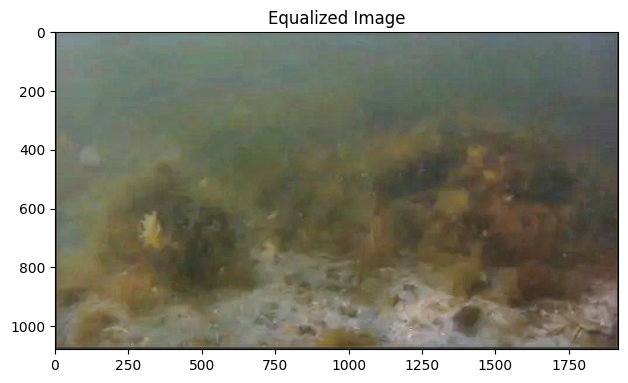

In [44]:
# Adaptive Histogram Equalization
img_equalised = np.zeros_like(deconvolved)
for i in range(3):
    img_equalised[:, :, i] = exposure.equalize_adapthist(deconvolved[:, :, i], clip_limit=0.01)

# Display final comparison
plt.figure(figsize=(16, 12))
plt.subplot(1, 2, 1)
plt.title("Equalized Image")
plt.imshow(img_equalised[:, :, ::-1])

plt.show()